<a href="https://colab.research.google.com/github/bizarrenebula/tf_clothes_dataset/blob/main/tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-Shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [ ]:
import random
random.seed(1)
train_idx = [i for i in range(len(train_labels))]
sampler = random.sample(train_idx, 25)

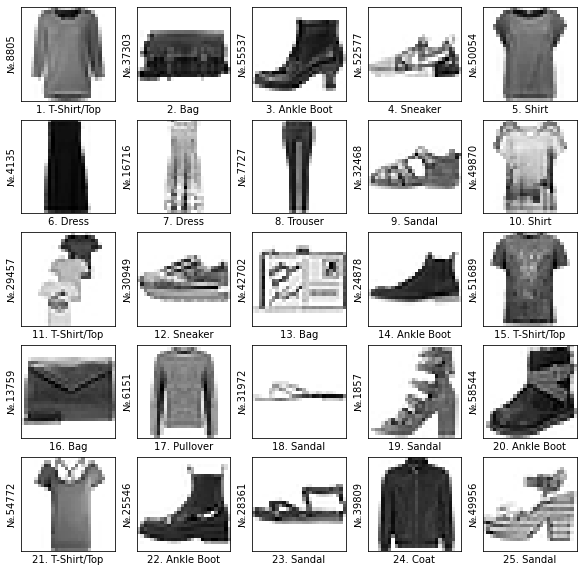

In [ ]:
plt.figure(figsize=(10,10))
for i,sample in enumerate(sampler):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[sample], cmap=plt.cm.binary)
  plt.xlabel(f'{i+1}. {class_names[train_labels[sample]]}')
  plt.ylabel(f'№.{sample}')
plt.show()

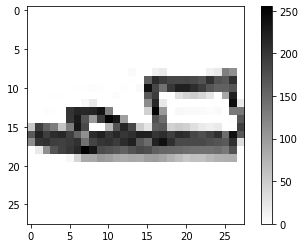

In [ ]:
plt.figure()
plt.imshow(train_images[28361], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# make them float
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_images[2141].shape

(28, 28)

In [ ]:
# build model

model = tf.keras.Sequential()

# add kayers

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.output_shape

(None, 10)

In [ ]:
# compile

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train 

model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="TB")

In [ ]:
image_id = 235

In [ ]:
# to be reviewed

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})', color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id], test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()

In [ ]:
plt.imshow(test_images[235], cmap=plt.cm.binary)